<a href="https://colab.research.google.com/github/muhammad-ammar1999/GoogleColab/blob/main/DataPreprocessedBLBOP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
!pip install pycaret
from pycaret.utils import version
version()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 22.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 112.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 104.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 91.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 135.3 MB/s eta 

'3.0.4'

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (12,9)
plt.rcParams['font.size'] = 10

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mae
from tensorflow.keras.metrics import Mean
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Research work/TM/FRMS/BLBOP_proto/Copy of Final_BL Data.xlsx")

data.dtypes

AC_ENTRY_SR_NO(traxlogid)      int64
AC_NO                          int64
TRN_CODE                       int64
1RCR_IN1                       int64
LCY_AMOUNT                   float64
TXN_DT_TIME                  float64
CUSTOMER_NO                    int64
UNIQUE_ID_VALUE                int64
RESPONSE_CODE                  int64
CHANNEL                        int64
EXTERNAL_AGENT_ID              int64
STATUS                         int64
dtype: object

In [ ]:
data.head(5)

,AC_ENTRY_SR_NO(traxlogid),AC_NO,TRN_CODE,1RCR_IN1,LCY_AMOUNT,TXN_DT_TIME,CUSTOMER_NO,UNIQUE_ID_VALUE,RESPONSE_CODE,CHANNEL,EXTERNAL_AGENT_ID,STATUS
0,10290948,9040078729200014,1,1,1000.0,2.023071e+13,787292,3230351966384,200,1,214,1
1,10290950,9040080704000018,1,1,1000.0,2.023071e+13,807040,3210381983540,200,1,215,1
2,10290954,9030019469200011,1,1,6000.0,2.023071e+13,194692,3230280004774,200,1,214,1
3,10312233,6460120567000012,0,1,6000.0,2.023071e+13,1205670,6982026,0,0,0,0
4,10312235,6460120567000012,0,1,6000.0,2.023071e+13,1205670,6982026,0,0,0,0


In [ ]:
data.isnull().sum()

AC_ENTRY_SR_NO(traxlogid)    0
AC_NO                        0
TRN_CODE                     0
1RCR_IN1                     0
LCY_AMOUNT                   0
TXN_DT_TIME                  8
CUSTOMER_NO                  0
UNIQUE_ID_VALUE              0
RESPONSE_CODE                0
CHANNEL                      0
EXTERNAL_AGENT_ID            0
STATUS                       0
dtype: int64

In [ ]:
# DATA DISTRIBUTION IN CATEGORICAL,NUMERIC FEATURE
cat_feats = [x for x in data.columns if len(data[x].unique()) <=2]
num_feats = [x for x in data.columns if x not in cat_feats]

In [ ]:
data['STATUS'].value_counts()

1    4586
0    3493
Name: STATUS, dtype: int64

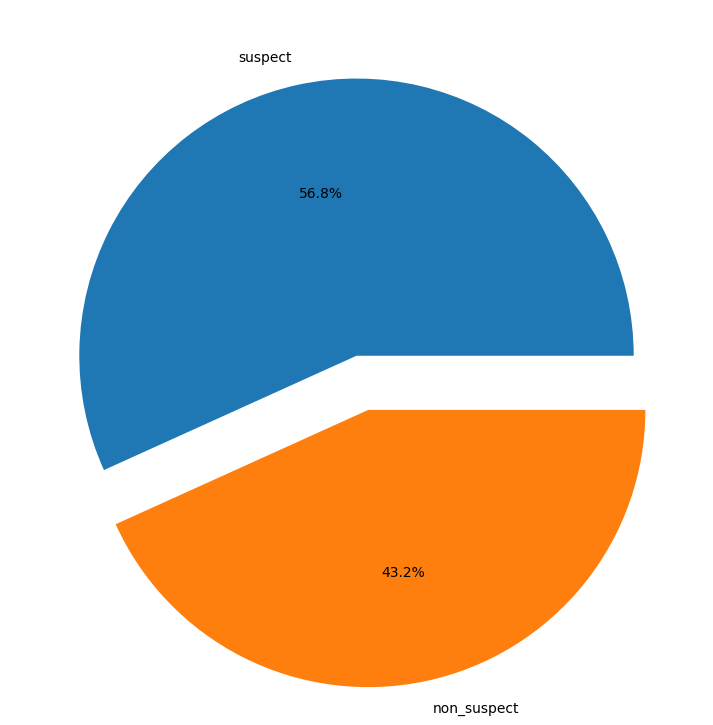

In [ ]:
vc = data['STATUS'].value_counts(ascending=False)

plt.pie(x=vc.values, labels=['suspect','non_suspect'], explode=[0.0, 0.2], autopct='%1.1f%%')
plt.show()

In [ ]:
ct = make_column_transformer(
    (StandardScaler(), num_feats)
)

df_scaled = pd.DataFrame(ct.fit_transform(data), columns=num_feats)
df_cat_feats = data[cat_feats]

data = pd.concat([df_scaled, df_cat_feats], axis=1)
data.head()

,AC_ENTRY_SR_NO(traxlogid),AC_NO,LCY_AMOUNT,TXN_DT_TIME,CUSTOMER_NO,UNIQUE_ID_VALUE,EXTERNAL_AGENT_ID,TRN_CODE,1RCR_IN1,RESPONSE_CODE,CHANNEL,STATUS
0,-0.439727,0.863392,-0.622254,0.316886,-0.542116,0.798461,0.862454,1,1,200,1,1
1,-0.439623,0.863394,-0.622254,0.316887,-0.489585,0.786426,0.871886,1,1,200,1,1
2,-0.439414,0.855519,0.474346,0.316894,-2.118491,0.798418,0.862454,1,1,200,1,1
3,0.669541,-1.155956,0.474346,0.347107,0.570810,-1.148318,-1.155988,0,1,0,0,0
4,0.669646,-1.155956,0.474346,0.347108,0.570810,-1.148318,-1.155988,0,1,0,0,0


In [ ]:
data.dtypes

AC_ENTRY_SR_NO(traxlogid)    float64
AC_NO                        float64
LCY_AMOUNT                   float64
TXN_DT_TIME                  float64
CUSTOMER_NO                  float64
UNIQUE_ID_VALUE              float64
EXTERNAL_AGENT_ID            float64
TRN_CODE                       int64
1RCR_IN1                       int64
RESPONSE_CODE                  int64
CHANNEL                        int64
STATUS                         int64
dtype: object

In [ ]:
train_size = 0.7
valid_size=0.3

In [ ]:
train_index = int(len(data)*train_size)
train_data = data[0:train_index]
train_data = data[train_index:]
train_data.shape

(2424, 12)

In [ ]:
from pycaret.classification import *
s = setup(data = train_data, target = 'STATUS', session_id=123)

,Description,Value
0,Session id,123
1,Target,STATUS
2,Target type,Binary
3,Original data shape,"(2424, 12)"
4,Transformed data shape,"(2424, 12)"
5,Transformed train set shape,"(1696, 12)"
6,Transformed test set shape,"(728, 12)"
7,Numeric features,11
8,Rows with missing values,0.3%
9,Preprocess,True


In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.9988,0.9989,1.0000,0.9974,0.9987,0.9976,0.9976,0.1000
ridge,Ridge Classifier,0.9988,0.0000,1.0000,0.9974,0.9987,0.9976,0.9976,0.1130
rf,Random Forest Classifier,0.9988,0.9989,1.0000,0.9974,0.9987,0.9976,0.9976,0.6600
gbc,Gradient Boosting Classifier,0.9988,0.9989,1.0000,0.9974,0.9987,0.9976,0.9976,0.6890
lda,Linear Discriminant Analysis,0.9988,0.9989,1.0000,0.9974,0.9987,0.9976,0.9976,0.1280
xgboost,Extreme Gradient Boosting,0.9988,0.9998,1.0000,0.9974,0.9987,0.9976,0.9976,0.1810
lightgbm,Light Gradient Boosting Machine,0.9988,0.9990,1.0000,0.9974,0.9987,0.9976,0.9976,0.3400
dt,Decision Tree Classifier,0.9982,0.9983,0.9986,0.9974,0.9980,0.9964,0.9964,0.0770
svm,SVM - Linear Kernel,0.9982,0.0000,1.0000,0.9961,0.9980,0.9964,0.9964,0.1300
et,Extra Trees Classifier,0.9982,0.9989,0.9986,0.9974,0.9980,0.9964,0.9964,0.4630


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

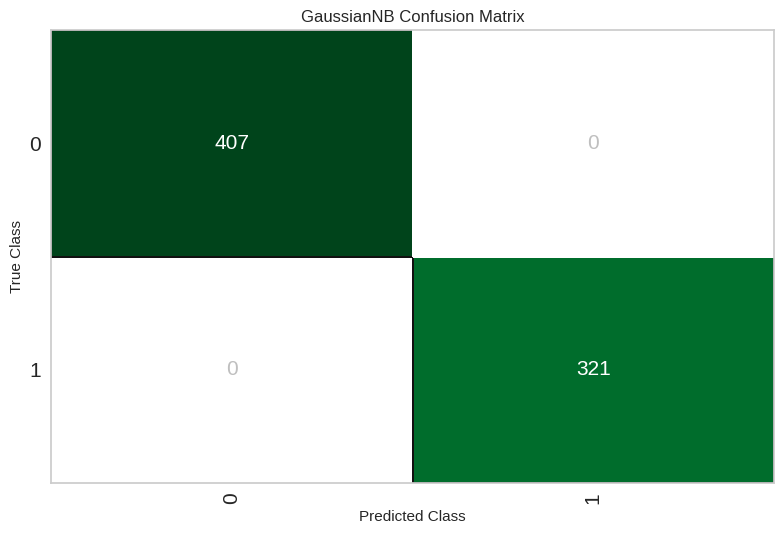

In [ ]:
plot_model(best_model, plot = 'confusion_matrix')

In [ ]:
predictions = predict_model(estimator=best_model, data=train_data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.9992,0.9993,1.0000,0.9981,0.9991,0.9983,0.9983


In [ ]:
predictions1 = predictions[["STATUS","prediction_label","prediction_score"]]
predictions1.head(500)

,STATUS,prediction_label,prediction_score
5655,1,1,1.0
5656,1,1,1.0
5657,1,1,1.0
5658,1,1,1.0
5659,1,1,1.0
...,...,...,...
6150,0,0,1.0
6151,1,1,1.0
6152,0,0,1.0
6153,0,0,1.0


import numpy as np
from google.colab import autoviz
df_2090049771182104101 = autoviz.get_registered_df('df_2090049771182104101')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2090049771182104101, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2090049771182104101 = autoviz.get_registered_df('df_2090049771182104101')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2090049771182104101, *['STATUS'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2090049771182104101 = autoviz.get_registered_df('df_2090049771182104101')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2090049771182104101, *['prediction_label'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2090049771182104101 = autoviz.get_registered_df('df_2090049771182104101')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2090049771182104101, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2090049771182104101 = autoviz.get_registered_df('df_2090049771182104101')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2090049771182104101, *['STATUS'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2090049771182104101 = autoviz.get_registered_df('df_2090049771182104101')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2090049771182104101, *['prediction_label'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2090049771182104101 = autoviz.get_registered_df('df_2090049771182104101')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_2090049771182104101, *[[['index', 'STATUS'], ['STATUS', 'prediction_label']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_2090049771182104101 = autoviz.get_registered_df('df_2090049771182104101')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_2090049771182104101, *['index', 'STATUS', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_2090049771182104101 = autoviz.get_registered_df('df_2090049771182104101')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_2090049771182104101, *['index', 'prediction_label', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_2090049771182104101 = autoviz.get_registered_df('df_2090049771182104101')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_2090049771182104101, *['index', 'count()', None], **{})
chart

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
from sklearn.metrics import classification_report
target_names = ['0', '1']

print(classification_report(predictions1.STATUS, predictions1.prediction_label, target_names=target_names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1356
           1       1.00      1.00      1.00      1068

    accuracy                           1.00      2424
   macro avg       1.00      1.00      1.00      2424
weighted avg       1.00      1.00      1.00      2424



In [ ]:
server = '.'
database = 'BAHL_AI_DB'
username = ''
password = ''
driver = 'ODBC Driver 17 for SQL Server'  # Adjust the driver name based on your system configuration
connection_string = f"mssql+pyodbc://{username}:{password}@{server}/{database}?driver={driver}"

In [ ]:
engine = sqlalchemy.create_engine(connection_string)

In [ ]:
connection = engine.connect()

# Example: Execute a query
result = connection.execute("SELECT TRXLOGID,TRAN_CODE from BAHLTransactions")
df2=pd.DataFrame(result)
for row in result:
    print(row)

# Close the connection
connection.close()

DBAPIError: ignored

In [ ]:
pyodbc.drivers()
pyodbc.connect(connection_string)

InterfaceError: ignored